In [2]:
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np
import pandas as pd
import sys
import PIL
import scipy.stats as stats
sys.path.insert(0, '/Users/lfsmbn/orkun/projects/ongoing/GBMF_motility/')

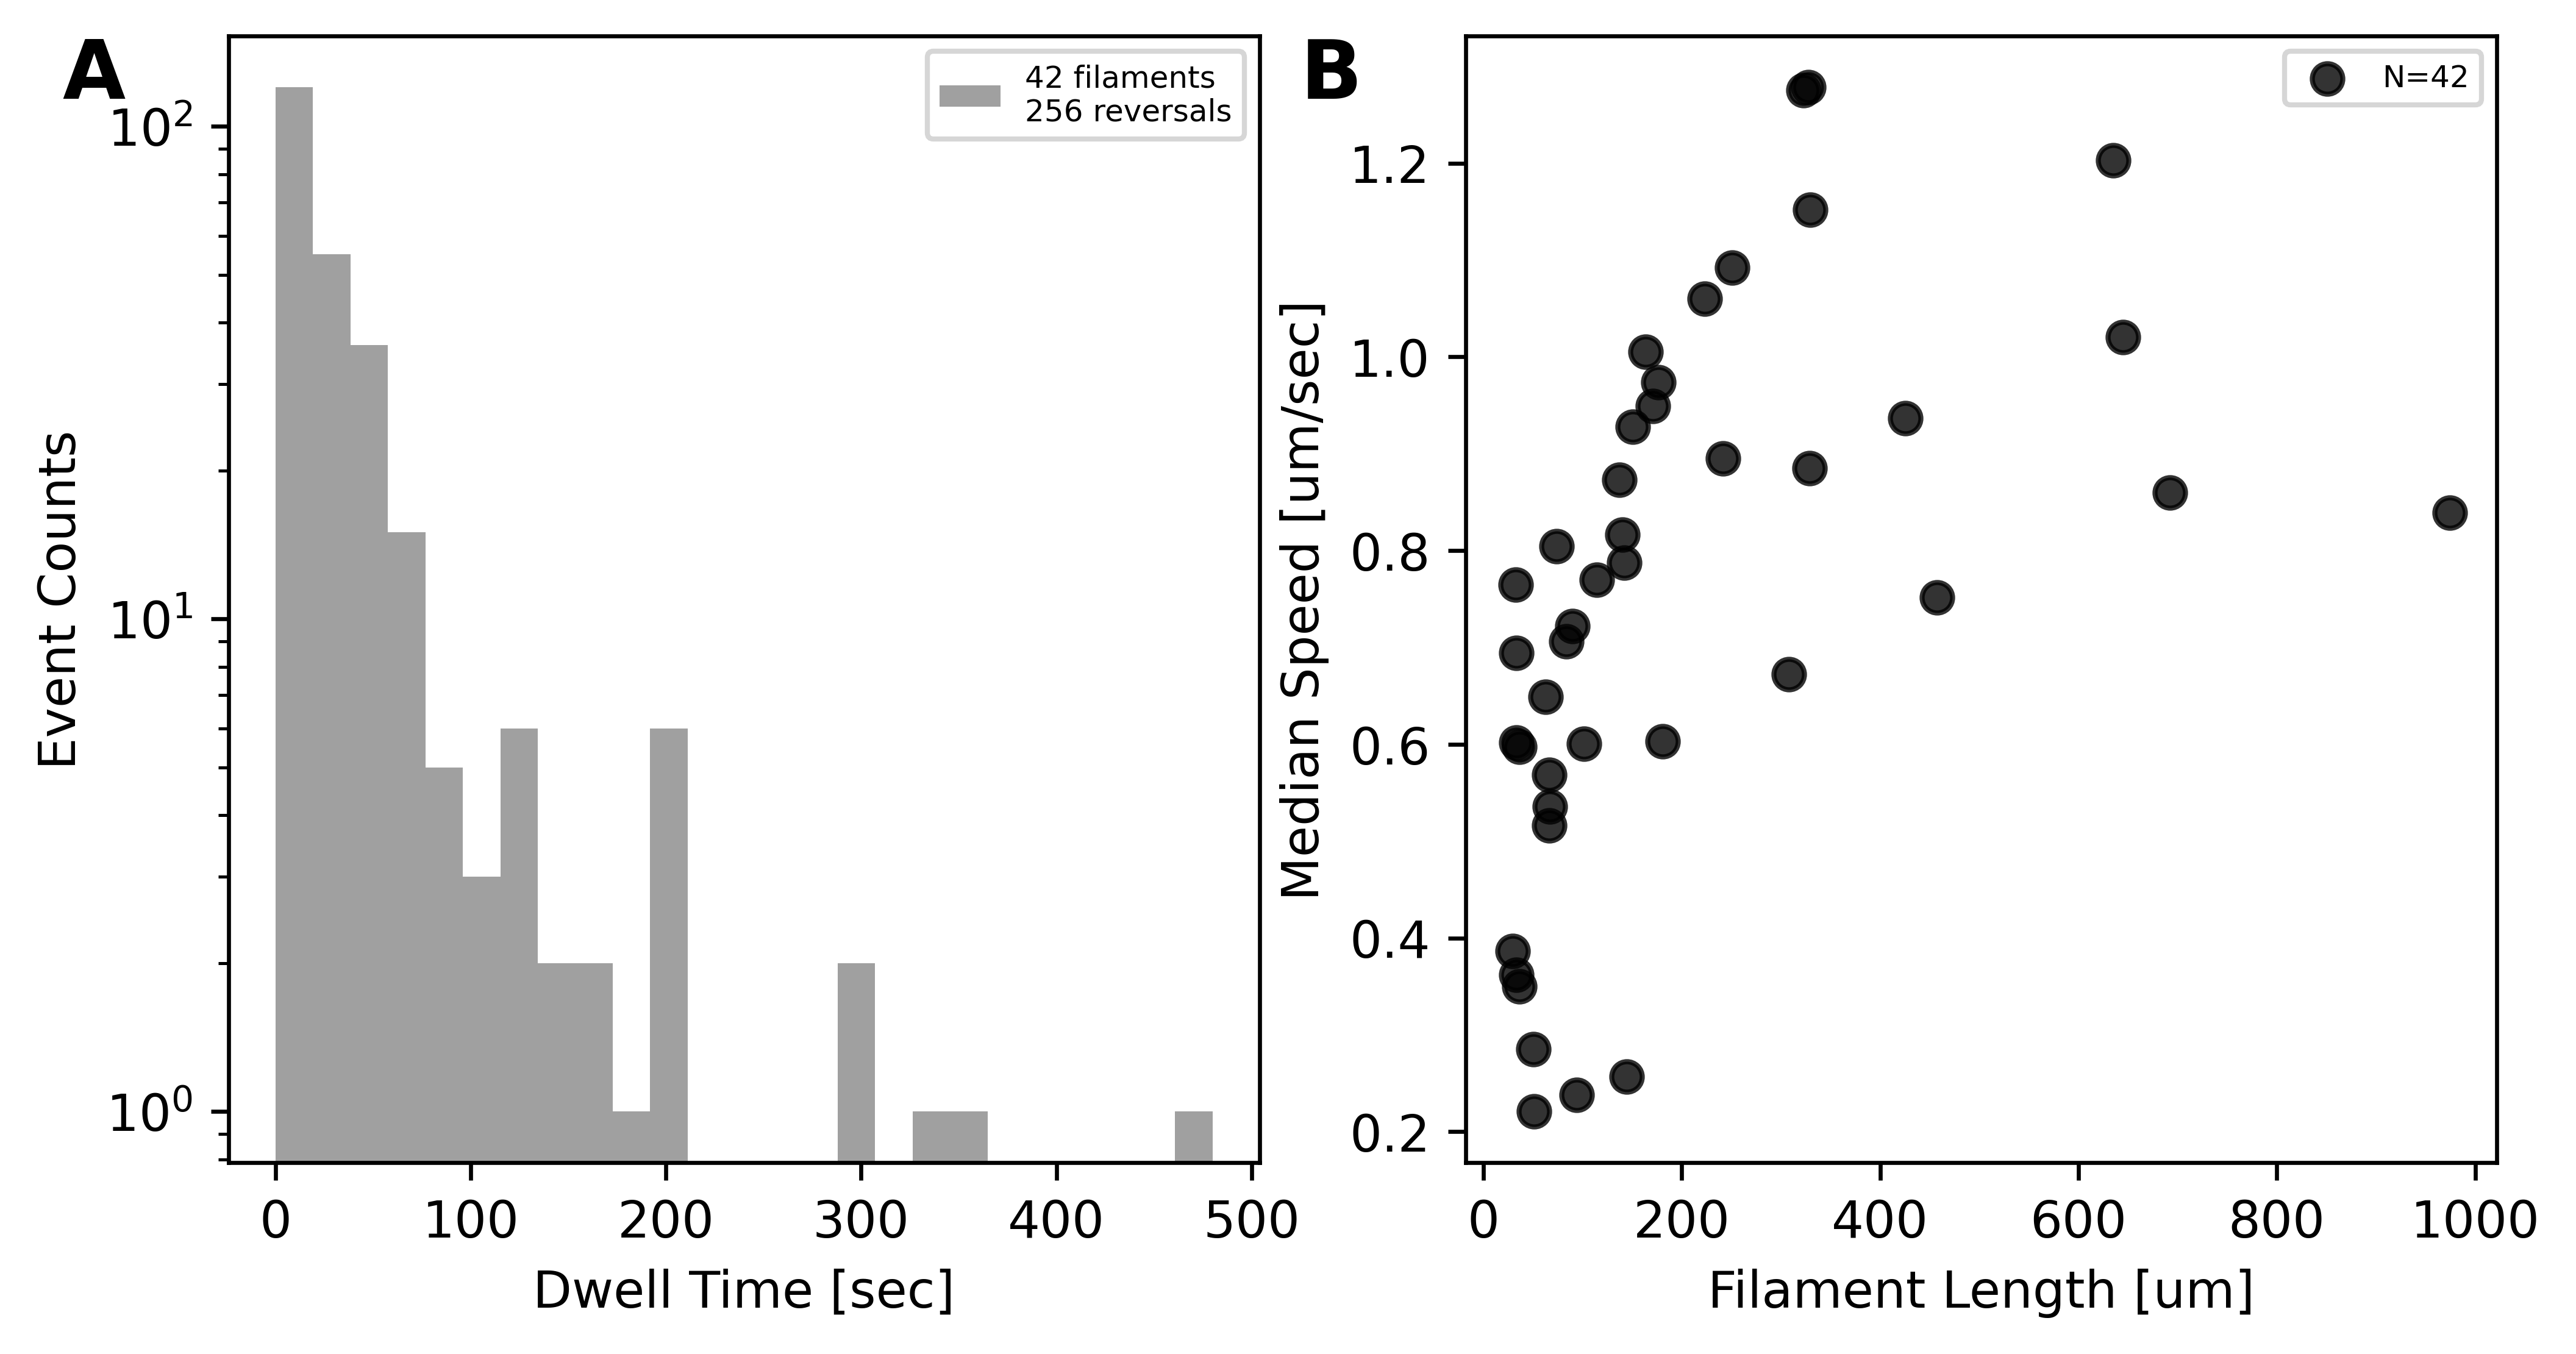

In [7]:
path = r'/Users/lfsmbn/orkun/projects/ongoing/GBMF_motility/Results_FINAL_glass/'
base = 'allData_glass'
saveFile = base+r'_dwelltime_speed_glass.png'
saveFile2 = base+r'_dwelltime_speed_glass.tif'

df = pd.read_csv(path+"0_allData_glass.csv",sep='\t')
df_values = df.iloc[:, 1:]
df_ids = df.iloc[:, 1]
mydat = df_values.to_numpy()

df_mean = df_values.groupby(['FilamentID'],as_index=False).mean()
df_mean_values = df_mean.iloc[:, 1:]
df_mean_ids = df_mean.iloc[:, 0]
mydat_glass = df_mean_values.to_numpy()

#plot
fig, ax = plt.subplots(1,2, figsize=(8,4), dpi=600)
ax[0].text(-0.1, 1, 'A', transform=ax[0].transAxes,
      fontsize=16, fontweight='bold', va='top', ha='right')
ax[0].hist(mydat[:,2],bins=25, density=False, alpha=0.75, color='gray',log=True, label="42 filaments\n256 reversals")
ax[0].set_ylabel('Event Counts')
ax[0].set_xlabel('Dwell Time [sec]')
ax[0].legend(loc="upper right",fontsize=6)

ax[1].text(-0.1, 1, 'B', transform=ax[1].transAxes,
      fontsize=16, fontweight='bold', va='top', ha='right')
ax[1].scatter(mydat_glass[:,7],mydat_glass[:,6],color='k',alpha=0.8,label="N=42")
ax[1].set_xlabel('Filament Length [um]')
ax[1].set_ylabel('Median Speed [um/sec]')
ax[1].legend(loc="upper right",fontsize=6)

fig.savefig(saveFile)
fig.savefig(saveFile2)
#plt.xscale('log')
plt.show()
plt.close(fig)